# DEF-D Fysieke Ontwerpopdracht 1 invul template

## Groepsgegevens en planning 

Aan het einde van deze ontwerpopdracht lever je als groep dit notebook gezamenlijk in via een pull request op Github en lever je een link naar dit pull request in op Brightspace. Zet jullie studienummers en namen in onderstaande tabel zodat wij zeker weten dat het groepsvormen goed is gegaan. Werk in de juiste branch.

| Groep: 7     |  |
| :-------------|:-------------|
| Christpoh Smit| 6494056 |
| John Sia      | 6223494 |
| Matthijs van OOstrum| 6540546 |

| Planning Groep: 7     |Tijdstip / Tijdspanne  |
|---|---|
| Mijlpaal 1: Criteria opgesteld | Voor de eerste pauze |
| Mijlpaal 2: Eerste kalibratie meting gedaan| Vlak na de eerste pauze |
| Pauze 1| Lunch pauze |
| Pauze 2| 14:45-15:00 |

## *Opdracht 1*: Foto van alle schetsen.

Zet de foto in dezelfde map als dit notebook en verander hieronder de naam in de naam van de foto.
![Alt](Fotoschetsenideeën-18-02-26.jpeg "analyse: ideeen")


## *Opdracht 2*, MIJLPAAL, Leerdoel
Vul onderstaande tabel in en geef aan met welke sensor je verder gaat.** Laat dit aan je TA zien.** Als je TA druk is: ga wel ondertussen door met de volgende stap.

| Sensor | Toepassing | Criteria |
|:---|:---|:---|
|lichtsensor | We willen met de lichtsensor een lantaarnpaal automatiseren. Als het buiten donker wordt willen we dat de lantaarnpaal aangaat en weer uit gaat als het licht wordt | Donker definieren we als 100 lux of lager. Licht definieren wij als hoger dan 100 lux. (Dit hebben wij buiten getest)|
| | | De lantaarnpaal zelf mag niet licht uitzenden met een intensiteit hoger dan 99, anders zet de lantaarnpaal zichzelf telkens aan en uit |
| |  | In de omgeving mag het licht niet zomaar veranderen van lichtintensiteit. Denk hierbij aan iemand die opeens een zaklamp kan schijnen op de sensor. De intensiteit van het licht moet een continuë functie zijn ,zoals de dag- en nachtcyclus.  |
|Druksensor | Kijken of een deur open of dicht gaat | Als de deur opengaat, zal de sensor een waarde geven van nul. Als de deur dicht zit, zit de sensor tussen de post en de deur en geeft hij een hogere waarde dan nul.  |
||  | In het circuit zal een lamp worden aangesloten op de sensor. Als de waarde hoger is dan 0 dan gaat er een lichtje aan dit laat zien dat de deur open is. |
||  | Criteria omschrijving |
|Warmtesensor| Meet wanneer een kopje koffie koud genoeg is om de te drinken | Meestal als je eem kopje koffie zet is hij te warm om meteen te meten. We meten hier tussen 20 en 90 graden Celsius door de sensor in de koffie te steken.   |
||  |  We kalibreren de sensor, als de sensor een waarde aangeeft die correspondeert met de waardes tussen 20 en 40 gaat er een lampje aan. Dit lampje geeft aan dat de koffie te drinken is
|| | |

Groep 7 heeft gekozen voor sensor lichtsensor. 

## *Opdracht 3*: Foto van de schets van jouw meetopstelling in. 
Licht kort toe wat er in de foto te zien is: In de foto zien we de schakelingen die aangesloten zijn op de arduino. De eerste schakeling is aangesloten op de 5v en de ground. Hier zit ook de lichtsensor (R1) in. De lichtsensor meet een bepaalde waarde. Als de waarde valt onder de 100 lux, dit komt overeen met een meetwaarde van 62.9 op de sensor, dan gaat er stroom vanaf pin acht door de tweede schakeling. In deze schakeling zit het lampje en dus zal het lampje aangaan als er minder dan 100 lux op valt. Als de sensor een hogere waarde meet, zal er nooit stroom lopen door de tweede schakeling en dus zal het lampje uit blijven. 
 ![Alt](Schematische-tekeningMeetopstelling-18-02-26.jpeg "schets student")

## *Opdracht 4*: Beantwoord de vragen

1. Welke variabelen ga je veranderen? 
Lichtintensiteit
2. Over welk bereik ga je deze variabelen veranderen?
10 tot 1000 lux ongeveer
3. Wat ga je allemaal meten?
de lichtintensiteit die valt op de lichtsensor dooor middel van phypox
4. Hoeveel metingen ga je doen?
rond de 10 metingen
5. Ga je met deze keuzes kunnen evalueren of jouw sensor geschikt is voor de gekozen toepassingen?
De sensor is erg gevoelig voor licht, als iemand langsloopt dan verandert al de lichtintensiteit. Er zit dus wel een flinke error op, maar er valt wel een goede fit te maken. 

## *Opdracht 5*: Foto van jouw meetopstelling in. Leerdoel.  
Licht kort toe wat er in de foto te zien is: Op de foto is de meetopstelling te  zien. We houden de LDR bij de telefoon met pyphox. Op de telefoon kunnen we zien hoeveel Lux er wordt waargenomen. Zo kunnen we de waardes van de sensor koppelen aan de echte waarde lux (Ook wel eiken genoemd). De arduino staat aangesloten op de computer voor stroom.  
 ![Alt](Meetopstelling-18-02-26.jpeg "meetopstelling student")

## *Opdracht 6*: Meten en fitten, Leerdoel

In [1]:
# Zet hier jouw data in een voor jou handig formaat
1

1

6.877123421438294 -5.859603171926011
62.91163104245693


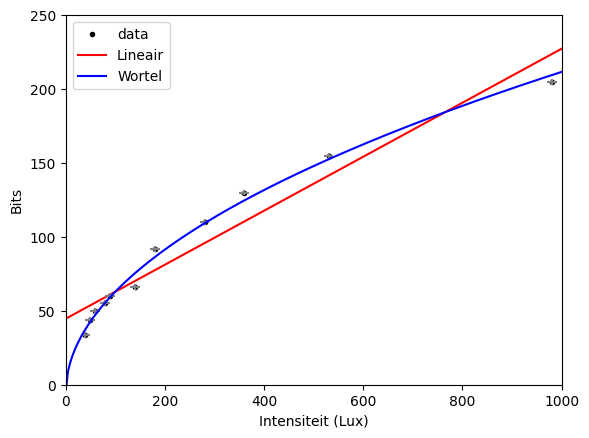

De wortel fit lijkt beter te passen bij de geeikte data.
De data volgt een sinusgolf waardoor de y error er makkelijk uit te filteren is door middel van een oscilliscoop. De y error is dus redelijk klein.


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

lux = np.array([980, 530, 280, 360, 180, 140, 90, 80, 60, 50, 40])
sensor = np.array([205, 155, 110, 130, 92, 66, 60, 55, 50, 44, 33.5])

def linear(x, a, b):
    return a * x + b

def root(x, a, b):
    return a * np.sqrt(x) + b


linvar, lincov = curve_fit(linear, lux, sensor)
rootvar, rootcov = curve_fit(root, lux, sensor)
print(*rootvar)
print(root(100, *rootvar))
x_test = np.linspace(0, 4600, 1000)
xerr = 10
yerr = 2

plt.plot(lux, sensor, "k.", label = "data")
plt.plot(x_test, linear(x_test, *linvar), "r-", label="Lineair")
plt.errorbar(lux, sensor, xerr=xerr, yerr=yerr, fmt="none", ecolor="gray")
plt.plot(x_test, root(x_test, *rootvar), "b-", label="Wortel")
plt.xlabel("Intensiteit (Lux)")
plt.ylabel("Bits")
plt.legend()
plt.xlim(0, 1000)
plt.ylim(0, 250)
plt.show()

print("De wortel fit lijkt beter te passen bij de geeikte data.")
print("De data volgt een sinusgolf waardoor de y error er makkelijk uit te filteren is door middel van een oscilliscoop. De y error is dus redelijk klein.")


## *Opdracht 7*: Iteratie nodig?

Nee, de opstelling werkt zoals bedoeld, onder de 100 lux begint het lampje bent branden dus geen iteratie is nodig. 

## *Opdracht 8*: Conclusie, leerdoel

Ja de LDR, lichtsensor, kan gebruikt worden om een lantaarnpaal te automatiseren als het donker wordt. Hier is donker gedefinieerd als een lichtintensiteit onder de 100 lux. 

## *Opdracht 9*: Aantonen leerdoelen beheersing

Om aan te tonen dat je de leerdoelen beheerst, kopieer je hieronder alle cellen met 'leerdoel' in de titel. Zet zelf de cellen onder de goede kopjes. Mogelijk komt een cel bij meerdere leerdoelen terug.

### Leerdoel 1: Simpele circuits (RC-circuit, spanningsdelers met sensoren) ontwerpen en fabriceren.

Kopieer hier de cel(len) waaruit blijkt dat jullie leerdoel 1 beheersen.

## *Opdracht 3*: Foto van de schets van jouw meetopstelling in. 
Licht kort toe wat er in de foto te zien is: In de foto zien we de schakelingen die aangesloten zijn op de arduino. De eerste schakeling is aangesloten op de 5v en de ground. Hier zit ook de lichtsensor (R1) in. De lichtsensor meet een bepaalde waarde. Als de waarde valt onder de 100 lux, dit komt overeen met een meetwaarde van 62.9 op de sensor, dan gaat er stroom vanaf pin acht door de tweede schakeling. In deze schakeling zit het lampje en dus zal het lampje aangaan als er minder dan 100 lux op valt. Als de sensor een hogere waarde meet, zal er nooit stroom lopen door de tweede schakeling en dus zal het lampje uit blijven. 
 ![Alt](Schematische-tekeningMeetopstelling-18-02-26.jpeg "schets student")

## *Opdracht 5*: Foto van jouw meetopstelling in. Leerdoel.  
Licht kort toe wat er in de foto te zien is: Op de foto is de meetopstelling te  zien. We houden de LDR bij de telefoon met pyphox. Op de telefoon kunnen we zien hoeveel Lux er wordt waargenomen. Zo kunnen we de waardes van de sensor koppelen aan de echte waarde lux (Ook wel eiken genoemd). De arduino staat aangesloten op de computer voor stroom.  
 ![Alt](Meetopstelling-18-02-26.jpeg "meetopstelling student")

### Leerdoel 2: Ontwerpeisen voor een opdracht SMART opstellen en vervolgens de ontwerpcyclus inrichten, rekening houdend met de randvoorwaarde van de opdracht.

Kopieer hier de cel(len) waaruit blijkt dat jullie leerdoel 2 beheersen.

## *Opdracht 7*: Iteratie nodig?

## *Opdracht 2*, MIJLPAAL, Leerdoel
Vul onderstaande tabel in en geef aan met welke sensor je verder gaat.** Laat dit aan je TA zien.** Als je TA druk is: ga wel ondertussen door met de volgende stap.

| Sensor | Toepassing | Criteria |
|:---|:---|:---|
|lichtsensor | We willen met de lichtsensor een lantaarnpaal automatiseren. Als het buiten donker wordt willen we dat de lantaarnpaal aangaat en weer uit gaat als het licht wordt | Donker definieren we als 100 lux of lager. Licht definieren wij als hoger dan 100 lux. (Dit hebben wij buiten getest)|
| | | De lantaarnpaal zelf mag niet licht uitzenden met een intensiteit hoger dan 99, anders zet de lantaarnpaal zichzelf telkens aan en uit |
| |  | In de omgeving mag het licht niet zomaar veranderen van lichtintensiteit. Denk hierbij aan iemand die opeens een zaklamp kan schijnen op de sensor. De intensiteit van het licht moet een continuë functie zijn ,zoals de dag- en nachtcyclus.  |
|Druksensor | Kijken of een deur open of dicht gaat | Als de deur opengaat, zal de sensor een waarde geven van nul. Als de deur dicht zit, zit de sensor tussen de post en de deur en geeft hij een hogere waarde dan nul.  |
||  | In het circuit zal een lamp worden aangesloten op de sensor. Als de waarde hoger is dan 0 dan gaat er een lichtje aan dit laat zien dat de deur open is. |
||  | Criteria omschrijving |
|Warmtesensor| Meet wanneer een kopje koffie koud genoeg is om de te drinken | Meestal als je eem kopje koffie zet is hij te warm om meteen te meten. We meten hier tussen 20 en 90 graden Celsius door de sensor in de koffie te steken.   |
||  |  We kalibreren de sensor, als de sensor een waarde aangeeft die correspondeert met de waardes tussen 20 en 40 gaat er een lampje aan. Dit lampje geeft aan dat de koffie te drinken is
|| | |

Groep 7 heeft gekozen voor sensor lichtsensor. 

## *Opdracht 1*: Foto van alle schetsen.

Zet de foto in dezelfde map als dit notebook en verander hieronder de naam in de naam van de foto.
![Alt](Fotoschetsenideeën-18-02-26.jpeg "analyse: ideeen")


6.877123421438294 -5.859603171926011
62.91163104245693


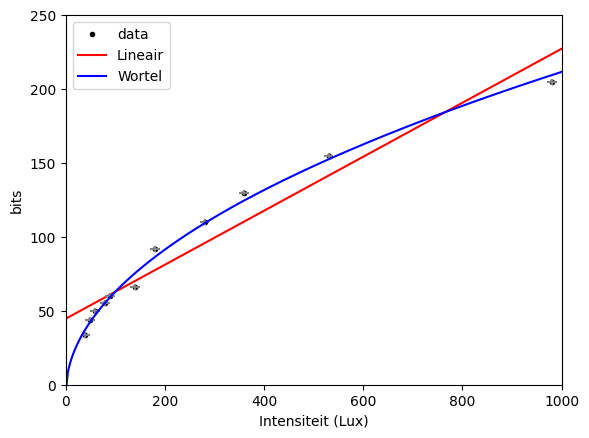

De wortel fit lijkt beter te passen bij de geeikte data.


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

lux = np.array([980, 530, 280, 360, 180, 140, 90, 80, 60, 50, 40])
sensor = np.array([205, 155, 110, 130, 92, 66, 60, 55, 50, 44, 33.5])

def linear(x, a, b):
    return a * x + b

def root(x, a, b):
    return a * np.sqrt(x) + b


linvar, lincov = curve_fit(linear, lux, sensor)
rootvar, rootcov = curve_fit(root, lux, sensor)
print(*rootvar)
print(root(100, *rootvar))
x_test = np.linspace(0, 4600, 1000)
xerr = 10
yerr = 2

plt.plot(lux, sensor, "k.", label = "data")
plt.plot(x_test, linear(x_test, *linvar), "r-", label="Lineair")
plt.errorbar(lux, sensor, xerr=xerr, yerr=yerr, fmt="none", ecolor="gray")
plt.plot(x_test, root(x_test, *rootvar), "b-", label="Wortel")
plt.xlabel("Intensiteit (Lux)")
plt.ylabel("bits")
plt.legend()
plt.xlim(0, 1000)
plt.ylim(0, 250)
plt.show()

print("De wortel fit lijkt beter te passen bij de geeikte data.")


### Leerdoel 3: Voor een gegeven sensor & analoog-digitaal convertor en gegeven (of zelf gekozen) toepassing een kalibratie meting ontwerpen, inclusief het circuit om de sensor aan te sluiten op de analoog-digitaal convertor, de opstelling bouwen, en meetresultaten verwerken en concluderen of de combinatie van sensor en analoog-digitaal conversie geschikt is voor de toepassing.

Kopieer hier de cel(len) waaruit blijkt dat jullie leerdoel 3 beheersen.

6.877123421438294 -5.859603171926011
62.91163104245693


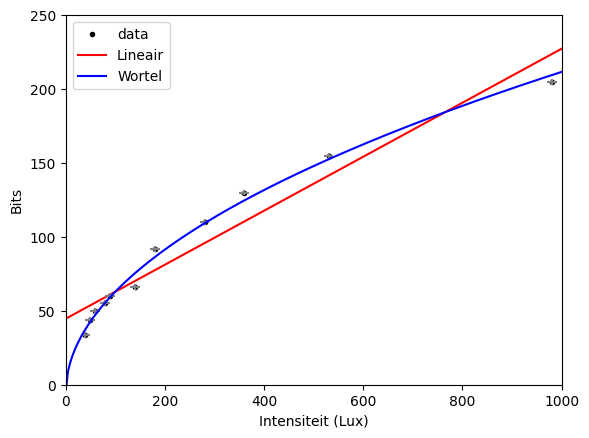

De wortel fit lijkt beter te passen bij de geeikte data.


In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

lux = np.array([980, 530, 280, 360, 180, 140, 90, 80, 60, 50, 40])
sensor = np.array([205, 155, 110, 130, 92, 66, 60, 55, 50, 44, 33.5])

def linear(x, a, b):
    return a * x + b

def root(x, a, b):
    return a * np.sqrt(x) + b


linvar, lincov = curve_fit(linear, lux, sensor)
rootvar, rootcov = curve_fit(root, lux, sensor)
print(*rootvar)
print(root(100, *rootvar))
x_test = np.linspace(0, 4600, 1000)
xerr = 10
yerr = 2

plt.plot(lux, sensor, "k.", label = "data")
plt.plot(x_test, linear(x_test, *linvar), "r-", label="Lineair")
plt.errorbar(lux, sensor, xerr=xerr, yerr=yerr, fmt="none", ecolor="gray")
plt.plot(x_test, root(x_test, *rootvar), "b-", label="Wortel")
plt.xlabel("Intensiteit (Lux)")
plt.ylabel("Bits")
plt.legend()
plt.xlim(0, 1000)
plt.ylim(0, 250)
plt.show()

print("De wortel fit lijkt beter te passen bij de geeikte data.")


## *Opdracht 5*: Foto van jouw meetopstelling in. Leerdoel.  
Licht kort toe wat er in de foto te zien is: Op de foto is de meetopstelling te  zien. We houden de LDR bij de telefoon met pyphox. Op de telefoon kunnen we zien hoeveel Lux er wordt waargenomen. Zo kunnen we de waardes van de sensor koppelen aan de echte waarde lux (Ook wel eiken genoemd). De arduino staat aangesloten op de computer voor stroom.  
 ![Alt](Meetopstelling-18-02-26.jpeg "meetopstelling student")

## *Opdracht 8*: Conclusie, leerdoel

Ja de LDR, lichtsensor, kan gebruikt worden om een lantaarnpaal te automatiseren als het donker wordt. Hier is donker gedefinieerd als een lichtintensiteit onder de 100 lux. 